## Neccessary Libraries Required For Data Analysis:

 * Numpy
 * Matplotlib
 * seaborn
 * Pandas

In [1]:
# importing neccessary libraries for data analysis

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Importing the dataset for data analysis

In [2]:
# importing the data from the dataset and storing in a dataframe

df = pd.read_csv('laptop_prices.csv')

In [3]:
# Viewing first 5 rows from the dataframe

df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


## Uni-Variate Analysis

In [4]:
# viewing the shape i.e no. of rows and columns of the dataframe

df.shape

(1303, 12)

In [5]:
# viewing information about data in each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
# checking for duplicated rows(if any) present in df

df.duplicated().sum()

0

In [7]:
# checking for missing(or null) values(if any) in df

df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
# describing the statistical information about the numeric data

df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


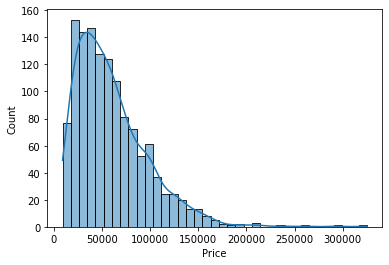

In [9]:
# plotting the distribution of price

sns.histplot(x = df['Price'], kde = True)
plt.show()

### Observations from above analysis:

* presence of no duplicate rows in the dataset
* presence of no missing values in the dataset
* 'Unnamed: 0' column is of no use, so better to remove
* 'Ram' column can be converted to int type by removing 'GB'
* 'Weight' column can be converted to float type by removing 'kg'
* There are many pieces of information stored in columns 'ScreenResolution', 'Cpu', 'Memory', 'Gpu' which can be extracted to check if there exists any relationship with dependant variable 'price'
* The distribution of data in price column is left skewed and needs transformation


## Data Preprocessing and cleaning

In [10]:
# removing 'Unnamed: 0' column from df

df.drop( columns = ['Unnamed: 0'], inplace = True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [11]:
# removing 'GB' and 'kg' from 'Ram' and 'Weight' and converting to int and foat respectively

df['Ram'] = df['Ram'].apply(lambda x : int(x.replace('GB','')))
df['Weight'] = df['Weight'].apply(lambda x : float(x.replace('kg','')))
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


In [13]:
# counting different categories of values present in 'ScreenResolution' column

df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2256x1504                              6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Touchscreen 2560x1440               

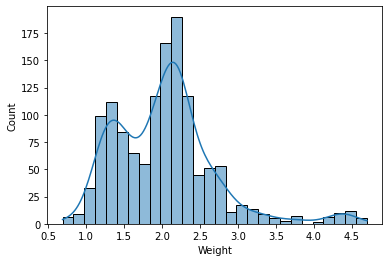

In [14]:
# plotting the distribution of weight

sns.histplot(x = df['Weight'], kde = True)
plt.show()

In [15]:
# extracting whether ips display present or not and then creating a new column

df['Ips_Panel'] = df['ScreenResolution'].apply(lambda x : 1 if 'IPS' in x else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ips_Panel
1032,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.70,63499.1040,0
770,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,256GB SSD,AMD Radeon R7 M445,Windows 10,2.30,62938.0656,0
1138,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,3.78,127818.7200,0
836,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.90,128884.3200,0
361,Asus,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.00,50349.6000,0


In [16]:
# extracting whether touchscreen present or not and then creating a new column

df['Touchscreen'] = df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ips_Panel,Touchscreen
544,Asus,Notebook,15.6,1366x768,AMD E-Series 7110 1.8GHz,4,500GB HDD,AMD Radeon R2 Graphics,Windows 10,2.0,18594.72,0,0
129,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,2.5,49443.84,0,0
689,Lenovo,Notebook,15.6,1366x768,Intel Celeron Dual Core 3855U 1.6GHz,4,500GB HDD,Intel HD Graphics 510,Windows 10,2.1,16943.04,0,0
439,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Linux,2.0,29783.52,0,0
597,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Intel HD Graphics 630,Windows 10,1.7,78534.72,1,0


In [17]:
# extracting resolution info

# extracting Width in pixel for each laptop and storing in new column
df['Width'] = df['ScreenResolution'].apply(lambda x : int((x.split('x')[0]).split()[-1]))

# extracting Height in pixel for each laptop and storing in a new column
df['Height'] = df['ScreenResolution'].apply(lambda x : int(x.split('x')[1]))

In [18]:
# removing 'ScreenResolution' column

df.drop(columns = ['ScreenResolution'], inplace = True)

#viewing the dataframe after deletion

df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ips_Panel,Touchscreen,Width,Height
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,2560,1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,2880,1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,2560,1600


In [19]:
# counting different categories of values present in 'Cpu' column

df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz               190
Intel Core i7 7700HQ 2.8GHz              146
Intel Core i7 7500U 2.7GHz               134
Intel Core i7 8550U 1.8GHz                73
Intel Core i5 8250U 1.6GHz                72
                                        ... 
Intel Core M 6Y54 1.1GHz                   1
AMD A12-Series 9700P 2.5GHz                1
AMD E-Series E2-9000 2.2GHz                1
Intel Celeron Dual Core N3060 1.60GHz      1
Intel Pentium Dual Core N4200 1.1GHz       1
Name: Cpu, Length: 118, dtype: int64

In [20]:
# Extracting Cpu brand and creating a new column to store it

def extract_cpu(cpu):
    processor = " ".join( cpu.split()[0 : 3] )
    if processor == 'Intel Core i7' or processor == 'Intel Core i5' or processor == 'Intel Core i3':
        return processor
    elif processor.split()[0] == 'Intel':
        return "Other Intel Processor"
    else:
        return processor.split()[0]

# creating a new column to store cpu brands by applying extract_cpu() on 'Cpu' column
 
df['Cpu_Brand'] = df['Cpu'].apply(extract_cpu)

In [21]:
# viewing the dataframe

df.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ips_Panel,Touchscreen,Width,Height,Cpu_Brand
467,Dell,Notebook,15.6,Intel Core i5 8250U 1.6GHz,8,2TB HDD,AMD Radeon 530,Windows 10,2.02,40439.52,0,0,1920,1080,Intel Core i5
656,Dell,Notebook,15.6,Intel Core i7 8550U 1.8GHz,8,256GB SSD,AMD Radeon 530,Windows 10,2.20,48964.32,0,0,1920,1080,Intel Core i7
1120,Vero,Notebook,13.3,Intel Atom X5-Z8350 1.44GHz,4,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.35,10442.88,0,0,1920,1080,Other Intel Processor
427,Dell,Ultrabook,14.0,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel HD Graphics 620,Linux,1.60,58554.72,0,0,1920,1080,Intel Core i7
811,MSI,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.90,128671.20,0,0,1920,1080,Intel Core i7


In [22]:
# removing cpu column 

df.drop( columns = ['Cpu'], inplace = True)

# viewing dataframe after removal of column

df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Ips_Panel,Touchscreen,Width,Height,Cpu_Brand
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,2560,1600,Intel Core i5
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,Intel Core i5
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,Intel Core i5
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,2880,1800,Intel Core i7
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,2560,1600,Intel Core i5


In [23]:
# Checking diffrent categories of data present in the newly created column

df['Cpu_Brand'].value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD                       62
Samsung                    1
Name: Cpu_Brand, dtype: int64

In [24]:
# removing the row having 'Samsung' as the type of 'Cpu_Brand'

df = df[ df['Cpu_Brand'] != 'Samsung']

# viewing the categories of data in 'Cpu_Brand' after the removal

df['Cpu_Brand'].value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD                       62
Name: Cpu_Brand, dtype: int64

In [25]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Ips_Panel,Touchscreen,Width,Height,Cpu_Brand
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,2560,1600,Intel Core i5
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,Intel Core i5
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,Intel Core i5
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,2880,1800,Intel Core i7
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,2560,1600,Intel Core i5


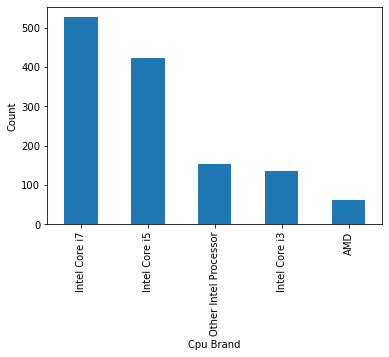

In [26]:
# plotting the count of each category of Cpu_Brand

df['Cpu_Brand'].value_counts().plot(kind='bar')
plt.xlabel('Cpu Brand')
plt.ylabel('Count')
plt.show()

In [27]:
# counting different categories of values present in 'Memory' column

df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
256GB SSD +  256GB SSD             2
256GB SSD +  500GB HDD             2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
512GB Flash Storage                2
8GB SSD                            1
2

In [28]:
# Extracting various memory types from the 'Memory' column

# function for extracting the HDD memory types
def extract_hdd(mem):
    hdd_size = 0
    words = mem.split()
    for i in range(0, len(words)):
        
        # extracting memory size for 'HDD' category
        if words[i] == "HDD":
            if "TB" in words[i-1]:
                val = words[i-1].replace("TB","")
                if val == "1.0":
                    hdd_size = 1 * 1024
                else:
                    hdd_size = int(val) * 1024
            else:
                hdd_size = int(words[i-1].replace("GB",""))

    return hdd_size

# function for extracting the SSD memory types
def extract_ssd(mem):
    ssd_size = 0
    words = mem.split()
    for i in range(0, len(words)):
        
        # extracting memory size for 'SSD' category
        if words[i] == "SSD":
            if "TB" in words[i-1]:
                ssd_size = int(words[i-1].replace("TB","")) * 1024
            else:
                ssd_size = int(words[i-1].replace("GB",""))

    return ssd_size

# function for extracting the Flash Storage memory types
def extract_flash(mem):
    flash_size = 0
    words = mem.split()
    for i in range(0, len(words)):
        
        # extracting memory size for 'Flash Storage' category
        if words[i] == "Flash":
            flash_size = int(words[i-1].replace("GB",""))

    return flash_size

# function for extracting the Hybrid memory types
def extract_hybrid(mem):
    hybrid_size = 0
    words = mem.split()
    for i in range(0, len(words)):
        
        # extracting memory size for 'HDD' category
        if words[i] == "Hybrid":
            if "TB" in words[i-1]:
                val = words[i-1].replace("TB","")
                if val == "1.0":
                    hybrid_size = 1 * 1024
                else:
                    hybrid_size = int(val) * 1024
            else:
                hybrid_size = int(words[i-1].replace("GB",""))

    return hybrid_size

In [29]:
# applying the extractor functions on memory column and storing the results into new columns

df['Hdd'] = df['Memory'].apply(extract_hdd)
df['Ssd'] = df['Memory'].apply(extract_ssd)
df['Flash_Storage'] = df['Memory'].apply(extract_flash)
df['Hybrid'] = df['Memory'].apply(extract_hybrid)

In [30]:
# viewing the dataframe
df.sample(10)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Ips_Panel,Touchscreen,Width,Height,Cpu_Brand,Hdd,Ssd,Flash_Storage,Hybrid
662,Lenovo,Notebook,15.6,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.20,28504.80,0,0,1920,1080,Intel Core i5,500,0,0,0
146,HP,Ultrabook,12.5,8,512GB SSD,Intel HD Graphics 515,Windows 10,0.97,107305.92,1,1,3840,2160,Other Intel Processor,0,512,0,0
168,Acer,Notebook,17.3,8,256GB SSD,Nvidia GeForce MX150,Windows 10,3.00,45501.12,1,0,1920,1080,Intel Core i5,0,256,0,0
1134,Acer,Notebook,15.6,4,1TB HDD,Nvidia GeForce 940MX,Windows 10,2.23,32820.48,0,0,1920,1080,Intel Core i5,1024,0,0,0
54,Acer,Notebook,15.6,4,1TB HDD,Intel HD Graphics 620,Windows 10,2.40,20459.52,0,0,1366,768,Intel Core i3,1024,0,0,0
49,Asus,Notebook,17.3,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.80,24828.48,0,0,1366,768,Other Intel Processor,1024,0,0,0
1028,Dell,Ultrabook,13.3,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.29,86526.72,0,1,3200,1800,Intel Core i5,0,256,0,0
59,Asus,Notebook,15.6,4,256GB SSD,Intel HD Graphics 520,Linux,2.00,22111.20,0,0,1920,1080,Intel Core i3,0,256,0,0
102,Dell,Notebook,15.6,8,1TB HDD,AMD Radeon 520,Linux,2.20,34472.16,0,0,1920,1080,Intel Core i5,1024,0,0,0
246,HP,Notebook,15.6,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.04,29783.52,0,1,1366,768,Intel Core i5,1024,0,0,0


In [31]:
# removing memory column after extraction of memory types

df.drop(columns = 'Memory', inplace = True)

In [32]:
# viewing dataframe after removal

df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Ips_Panel,Touchscreen,Width,Height,Cpu_Brand,Hdd,Ssd,Flash_Storage,Hybrid
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,2560,1600,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,Intel Core i5,0,0,128,0
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,2880,1800,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,2560,1600,Intel Core i5,0,256,0,0


In [33]:
# counting different categories of values present in 'Gpu' column

df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro 3000M          1
AMD R17M-M1-70               1
AMD Radeon Pro 560           1
AMD FirePro W5130M           1
Nvidia GeForce 920           1
Name: Gpu, Length: 109, dtype: int64

In [34]:
# creating and storing gpu brands against each laptop

df['Gpu_Brand'] = df['Gpu'].apply(lambda x : x.split()[0])

In [35]:
# Viewing df

df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Ips_Panel,Touchscreen,Width,Height,Cpu_Brand,Hdd,Ssd,Flash_Storage,Hybrid,Gpu_Brand
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,2560,1600,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,Intel Core i5,0,0,128,0,Intel
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,2880,1800,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,2560,1600,Intel Core i5,0,256,0,0,Intel


In [36]:
# removing Gpu column

df.drop(columns = 'Gpu', inplace = True)

In [37]:
# Viewing df

df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Ips_Panel,Touchscreen,Width,Height,Cpu_Brand,Hdd,Ssd,Flash_Storage,Hybrid,Gpu_Brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,1,0,2560,1600,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,0,0,1440,900,Intel Core i5,0,0,128,0,Intel
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,0,0,1920,1080,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,1,0,2880,1800,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,1,0,2560,1600,Intel Core i5,0,256,0,0,Intel


In [38]:
# checking counts of each category in 'Gpu_Brand' column

df['Gpu_Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu_Brand, dtype: int64

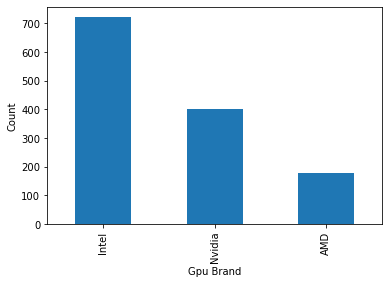

In [39]:
# plotting the count of each category of Gpu_Brand

df['Gpu_Brand'].value_counts().plot(kind='bar')
plt.xlabel('Gpu Brand')
plt.ylabel('Count')
plt.show()

In [40]:
# checking counts of each category in 'OpSys' column

df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

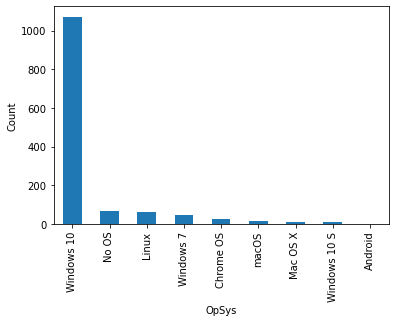

In [41]:
# plotting the count of each category of OpSys

df['OpSys'].value_counts().plot(kind='bar')
plt.xlabel('OpSys')
plt.ylabel('Count')
plt.show()

In [42]:
# function to categorize os

def categorise_os(opsys):
    if opsys == "Windows 10" or opsys == "Windows 7" or opsys == "Windows 10 S":
        return "Windows"
    elif opsys == "macOS" or opsys == "Mac OS X":
        return "Mac"
    else:
        return "Other OS / No OS"

In [43]:
# applying categorise_os() on 'OpSys' column and storing result in new column

df['Operating_System'] = df['OpSys'].apply(categorise_os)

In [44]:
# removing 'OpSys' column 

df.drop(columns = 'OpSys', inplace = True)

In [45]:
# viewing df

df.sample(5)

,Company,TypeName,Inches,Ram,Weight,Price,Ips_Panel,Touchscreen,Width,Height,Cpu_Brand,Hdd,Ssd,Flash_Storage,Hybrid,Gpu_Brand,Operating_System
752,Asus,Notebook,15.6,4,2.45,30849.1200,0,0,1366,768,Intel Core i5,1024,0,0,0,Nvidia,Other OS / No OS
448,MSI,Gaming,15.6,8,2.20,54757.9872,0,0,1920,1080,Intel Core i5,0,256,0,0,Nvidia,Windows
695,Acer,Netbook,11.6,4,1.40,14332.3200,0,0,1366,768,Other Intel Processor,0,0,32,0,Intel,Windows
341,Lenovo,Notebook,15.6,12,2.20,47898.7200,0,0,1920,1080,AMD,2048,0,0,0,AMD,Windows
380,HP,Gaming,17.3,8,3.35,63456.4800,1,0,1920,1080,Intel Core i7,1024,128,0,0,Nvidia,Windows


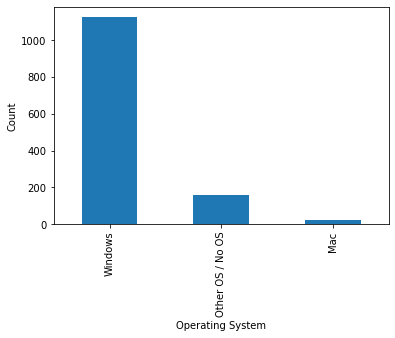

In [46]:
# plotting the count of each category of Operating_System

df['Operating_System'].value_counts().plot(kind='bar')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.show()

In [47]:
# checking counts of each category in 'TypeName' column

df['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

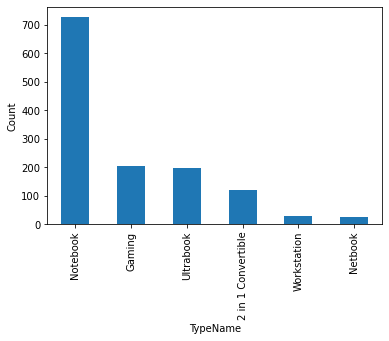

In [48]:
# plotting the count of each category of TypeName

df['TypeName'].value_counts().plot(kind='bar')
plt.xlabel('TypeName')
plt.ylabel('Count')
plt.show()

In [49]:
# checking counts of each category in 'Company' column

df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

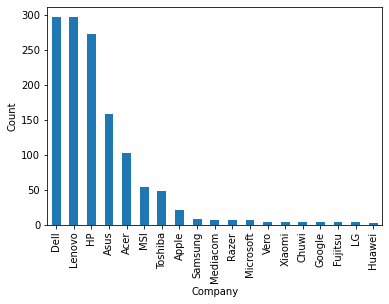

In [50]:
# plotting the count of each category of Company

df['Company'].value_counts().plot(kind='bar')
plt.xlabel('Company')
plt.ylabel('Count')
plt.show()

In [51]:
# checking counts of each category in 'Ram' column

df['Ram'].value_counts()

8     619
4     374
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

In [52]:
# removing the row with 64gb ram

df = df[ df['Ram'] != 64]

# viewing df

df.sample(5)

,Company,TypeName,Inches,Ram,Weight,Price,Ips_Panel,Touchscreen,Width,Height,Cpu_Brand,Hdd,Ssd,Flash_Storage,Hybrid,Gpu_Brand,Operating_System
994,Dell,2 in 1 Convertible,13.3,8,1.68,47365.9200,0,1,1920,1080,Intel Core i5,0,256,0,0,Intel,Windows
661,Lenovo,Notebook,15.6,4,2.20,22324.3200,0,0,1366,768,Other Intel Processor,500,0,0,0,Intel,Windows
374,Dell,2 in 1 Convertible,13.3,8,1.62,46300.8528,0,1,1920,1080,Intel Core i7,0,256,0,0,Intel,Windows
1272,Lenovo,Notebook,14.0,2,1.50,12201.1200,0,0,1366,768,Other Intel Processor,0,0,64,0,Intel,Windows
174,HP,Notebook,17.3,8,2.50,49177.4400,0,0,1920,1080,Intel Core i5,0,256,0,0,Nvidia,Windows


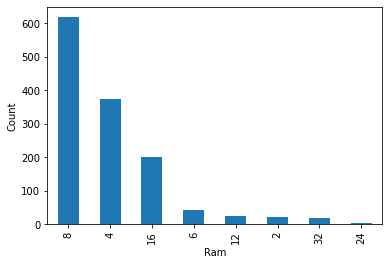

In [53]:
# plotting the count of each category of ram

df['Ram'].value_counts().plot(kind='bar')
plt.xlabel('Ram')
plt.ylabel('Count')
plt.show()

In [54]:
# viewing the structure of the df after preprocessing and cleaning the data

df.shape

(1301, 17)

In [55]:
# viewing the data information in each column

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1301 non-null   object 
 1   TypeName          1301 non-null   object 
 2   Inches            1301 non-null   float64
 3   Ram               1301 non-null   int64  
 4   Weight            1301 non-null   float64
 5   Price             1301 non-null   float64
 6   Ips_Panel         1301 non-null   int64  
 7   Touchscreen       1301 non-null   int64  
 8   Width             1301 non-null   int64  
 9   Height            1301 non-null   int64  
 10  Cpu_Brand         1301 non-null   object 
 11  Hdd               1301 non-null   int64  
 12  Ssd               1301 non-null   int64  
 13  Flash_Storage     1301 non-null   int64  
 14  Hybrid            1301 non-null   int64  
 15  Gpu_Brand         1301 non-null   object 
 16  Operating_System  1301 non-null   object 


In [56]:
# checking for missing values

df.isnull().sum()

Company             0
TypeName            0
Inches              0
Ram                 0
Weight              0
Price               0
Ips_Panel           0
Touchscreen         0
Width               0
Height              0
Cpu_Brand           0
Hdd                 0
Ssd                 0
Flash_Storage       0
Hybrid              0
Gpu_Brand           0
Operating_System    0
dtype: int64

In [57]:
# describing the statistical information about the numeric data

df.describe()

,Inches,Ram,Weight,Price,Ips_Panel,Touchscreen,Width,Height,Hdd,Ssd,Flash_Storage,Hybrid
count,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000,1301.000000
mean,15.017525,8.342813,2.038232,59772.303145,0.279016,0.146810,1894.376633,1070.416603,422.339739,182.342813,4.538048,9.048424
std,1.424003,4.847450,0.664156,37026.420261,0.448688,0.354053,494.822358,284.359277,526.489049,184.532263,30.287537,94.811075
min,10.100000,2.000000,0.690000,9270.720000,0.000000,0.000000,1366.000000,768.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,4.000000,1.500000,31914.720000,0.000000,0.000000,1600.000000,900.000000,0.000000,0.000000,0.000000,0.000000
50%,15.600000,8.000000,2.040000,52054.560000,0.000000,0.000000,1920.000000,1080.000000,0.000000,256.000000,0.000000,0.000000
75%,15.600000,8.000000,2.300000,79215.105600,1.000000,0.000000,1920.000000,1080.000000,1024.000000,256.000000,0.000000,0.000000
max,18.400000,32.000000,4.700000,324954.720000,1.000000,1.000000,3840.000000,2160.000000,2048.000000,1024.000000,512.000000,1024.000000


### Observations

* Data in 'Price' column is not well organised. Might be due to the presence of outliers in data

# Bi-Variate Analysis

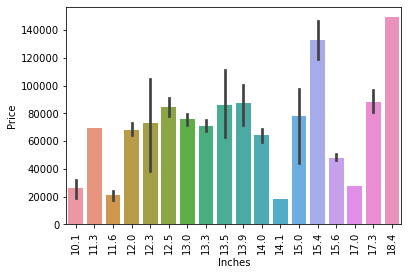

In [58]:
# performing bi-variate analysis on display Components of laptops

sns.barplot(x = df['Inches'], y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

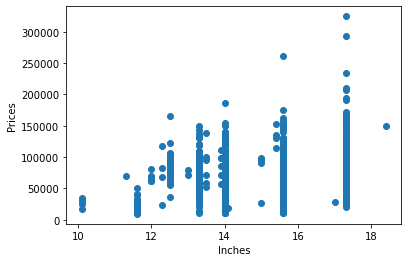

In [59]:
plt.scatter(x = df['Inches'], y = df['Price'])
plt.xlabel('Inches')
plt.ylabel('Prices')
plt.show()

In [60]:
# finding the correlation coefficient between price and Inches from correlation matrix

df.corr()['Price']['Inches']

0.06277206931944589

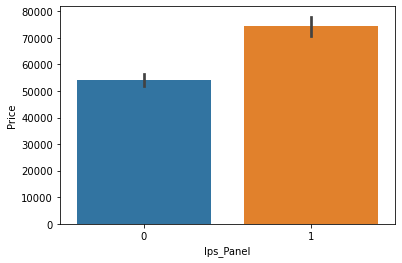

In [61]:
sns.barplot(x = df['Ips_Panel'], y = df['Price'])
plt.show()

In [62]:
# finding the correlation coefficient between price and Ips panel from correlation matrix

df.corr()['Price']['Ips_Panel']

0.25013731433865505

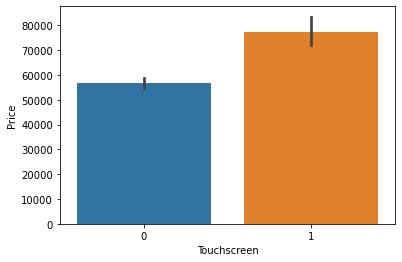

In [63]:
sns.barplot(x = df['Touchscreen'], y = df['Price'])
plt.show()

In [64]:
# finding the correlation coefficient between price and Touchscreen from correlation matrix

df.corr()['Price']['Touchscreen']

0.19548409135551914

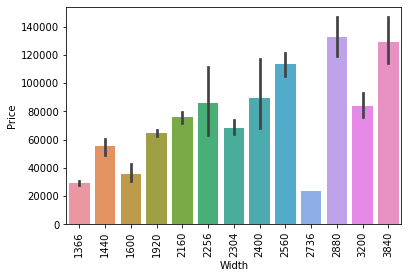

In [65]:
sns.barplot(x = df['Width'], y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

In [66]:
# finding the correlation coefficient between price and Width from correlation matrix

df.corr()['Price']['Width']

0.5608056021969482

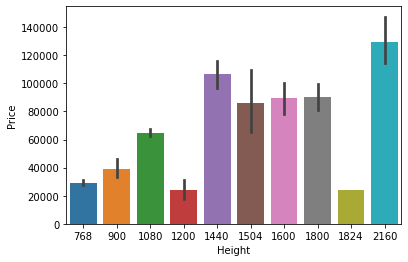

In [67]:
sns.barplot(x = df['Height'], y = df['Price'])
plt.show()

In [68]:
# finding the correlation coefficient between price and Height from correlation matrix

df.corr()['Price']['Height']

0.5580664305977088

### Observations after bi-variate analysis on display components of laptop

* There is a very less correlation(since < 0.1, close to 0) between Price and Inches so, Inches column can be dropped
* Ips Panel and Touchscreen columns have quite moderate correlation with price and can be kept
* Width and Height have good correlation with price having almost the same correlation coefficient

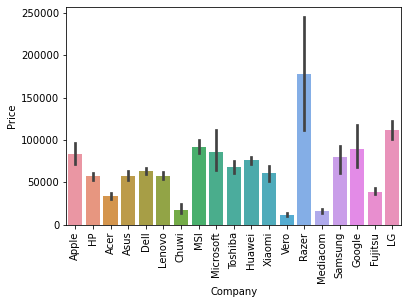

In [69]:
# performing bi-variate analysis on company column

sns.barplot(x = df['Company'], y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

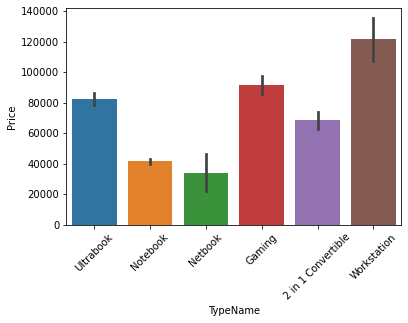

In [70]:
# performing bi-variate analysis on TypeName column

sns.barplot(x = df['TypeName'], y = df['Price'])
plt.xticks(rotation = 45)
plt.show()

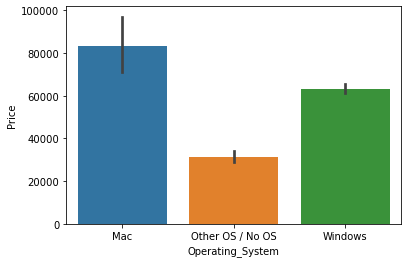

In [71]:
# performing bi-variate analysis on Operating System column

sns.barplot(x = df['Operating_System'], y = df['Price'])
plt.show()

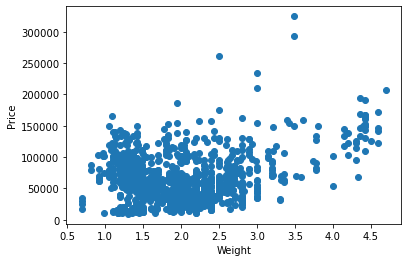

In [72]:
# performing bi-variate analysis on Weight column

plt.scatter(x = df['Weight'], y = df['Price'])
plt.xlabel('Weight')
plt.ylabel('Price')
plt.show()

In [73]:
# finding the correlation coefficient between price and Weight from correlation matrix

df.corr()['Price']['Weight']

0.20433338622444044

### Observations after bi-variate analysis on company, type, OS and weight of laptops

* There is a variation of price with company of laptops
* There is a variation of price with the type of laptops
* There is a variation of price with the type of OS in laptops
* There is a moderate correlation between weight and price of laptops

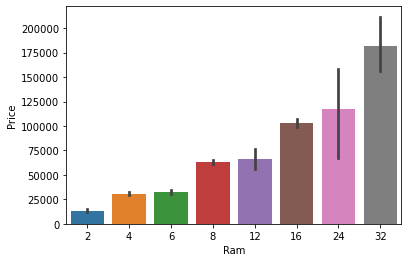

In [74]:
# performing bi-variate analysis on memory Components of laptops

sns.barplot(x = df['Ram'], y = df['Price'])
plt.show()

In [75]:
# finding the correlation coefficient between price and Ram from correlation matrix

df.corr()['Price']['Ram']

0.7484373235328984

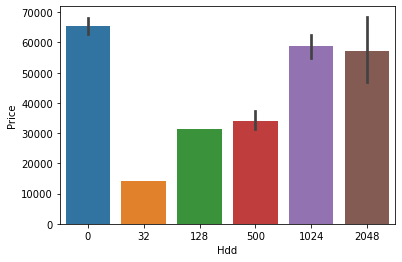

In [76]:
sns.barplot(x = df['Hdd'], y = df['Price'])
plt.show()

In [77]:
# finding the correlation coefficient between price and Hdd from correlation matrix

df.corr()['Price']['Hdd']

-0.09263287349939003

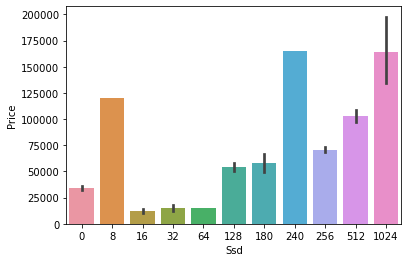

In [78]:
sns.barplot(x = df['Ssd'], y = df['Price'])
plt.show()

In [79]:
# finding the correlation coefficient between price and Ssd from correlation matrix

df.corr()['Price']['Ssd']

0.6712774137451808

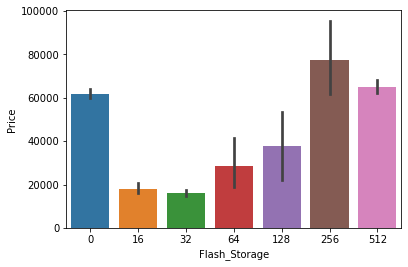

In [80]:
sns.barplot(x = df['Flash_Storage'], y = df['Price'])
plt.show()

In [81]:
# finding the correlation coefficient between price and Flash_Storage from correlation matrix

df.corr()['Price']['Flash_Storage']

-0.039853642482667255

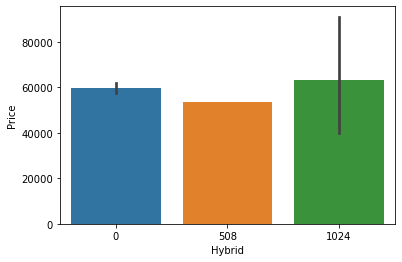

In [82]:
sns.barplot(x = df['Hybrid'], y = df['Price'])
plt.show()

In [83]:
# finding the correlation coefficient between price and Hybrid from correlation matrix

df.corr()['Price']['Hybrid']

0.008316073894507378

### Observations after bi-variate analysis on memory components of laptop

* There is a strong correlation between Ram sizes and Prices of laptops
* There is a less correlation between Hdd sizes and Prices of laptops
* There is a strong correlation between Ssd sizes and Prices of laptops
* There is almost negligible correlation(since close to 0) between Flash Storage sizes and Prices of laptops
* There is almost negligible correlation(since close to 0) between Hybrid sizes and Prices of laptops
* Columns 'Flash_Storage' and 'Hybrid' can be dropped
* From business perspective although hdd is very weakly correlated with price, it can be kept

In [84]:
# removing columns 'Flash_Storage' and 'Hybrid' 

df.drop(columns = ['Flash_Storage', 'Hybrid'], inplace = True)

# viewing a sample of data from df after removal of columns

df.sample(10)

,Company,TypeName,Inches,Ram,Weight,Price,Ips_Panel,Touchscreen,Width,Height,Cpu_Brand,Hdd,Ssd,Gpu_Brand,Operating_System
202,Acer,Notebook,15.6,8,2.23,39533.7600,0,0,1920,1080,Intel Core i7,1024,0,Nvidia,Windows
190,Lenovo,2 in 1 Convertible,14.0,16,1.42,150462.7200,0,1,2560,1440,Intel Core i7,0,1024,Intel,Windows
53,HP,Notebook,13.3,8,1.49,58767.8400,0,0,1920,1080,Intel Core i7,0,512,Intel,Windows
272,Dell,Notebook,15.6,8,2.14,39164.5296,0,0,1920,1080,Intel Core i7,0,256,AMD,Other OS / No OS
833,Lenovo,Notebook,14.0,8,1.70,63190.0800,0,0,1920,1080,Intel Core i5,0,256,Intel,Windows
95,Acer,2 in 1 Convertible,13.3,8,1.50,45128.1600,1,1,1920,1080,Intel Core i5,0,256,Intel,Windows
249,Apple,Ultrabook,13.3,8,1.37,108691.2000,1,0,2560,1600,Intel Core i5,0,512,Intel,Mac
67,HP,Notebook,14.0,4,1.44,12201.1200,0,0,1366,768,Other Intel Processor,0,32,Intel,Windows
874,Samsung,Ultrabook,15.0,16,1.23,98514.7200,0,0,1920,1080,Intel Core i7,0,256,Nvidia,Windows
868,Acer,Notebook,14.0,8,1.56,48058.5600,1,0,1920,1080,Intel Core i5,0,256,Intel,Windows


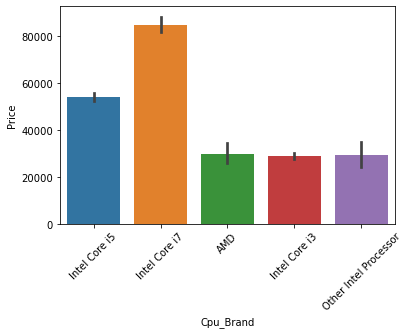

In [85]:
# performing bi-variate analysis on Cpu_Brand of laptops

sns.barplot(x = df['Cpu_Brand'], y = df['Price'])
plt.xticks(rotation = 45)
plt.show()

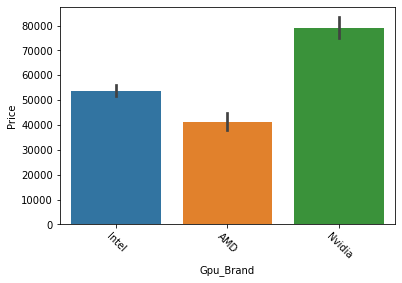

In [86]:
# performing bi-variate analysis on Gpu_Brand of laptops

sns.barplot(x = df['Gpu_Brand'], y = df['Price'])
plt.xticks(rotation = -45)
plt.show()

### Observations after bi-variate analysis on Cpu and Gpu brands of laptop

* There is a variation of price of laptops with the CPU brands of laptops
* There is a variation of price of laptops with the GPU brands of laptops

# Correlation Analysis

In [87]:
# Displaying the correlation matrix

df.corr()

,Inches,Ram,Weight,Price,Ips_Panel,Touchscreen,Width,Height,Hdd,Ssd
Inches,1.000000,0.234954,0.827067,0.062772,-0.114929,-0.359382,-0.070008,-0.093067,0.532867,-0.116983
Ram,0.234954,1.000000,0.382661,0.748437,0.204266,0.128421,0.455101,0.447141,0.111317,0.598263
Weight,0.827067,0.382661,1.000000,0.204333,0.015833,-0.292889,-0.032024,-0.052209,0.518325,-0.071146
Price,0.062772,0.748437,0.204333,1.000000,0.250137,0.195484,0.560806,0.558066,-0.092633,0.671277
Ips_Panel,-0.114929,0.204266,0.015833,0.250137,1.000000,0.148694,0.280803,0.287648,-0.090920,0.225365
Touchscreen,-0.359382,0.128421,-0.292889,0.195484,0.148694,1.000000,0.350137,0.355790,-0.208376,0.260772
Width,-0.070008,0.455101,-0.032024,0.560806,0.280803,0.350137,1.000000,0.994480,-0.123564,0.539295
Height,-0.093067,0.447141,-0.052209,0.558066,0.287648,0.355790,0.994480,1.000000,-0.134857,0.531621
Hdd,0.532867,0.111317,0.518325,-0.092633,-0.090920,-0.208376,-0.123564,-0.134857,1.000000,-0.396890
Ssd,-0.116983,0.598263,-0.071146,0.671277,0.225365,0.260772,0.539295,0.531621,-0.396890,1.000000


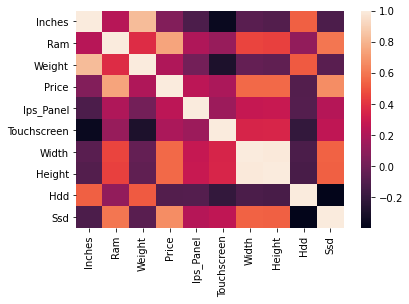

In [88]:
# displaying the heatmap for the above correlation matrix for visualization

sns.heatmap(df.corr())
plt.show()

### Observations

* Almost all the variables have a good correlaion with the target column price
* Inches and Weight have a strong correlation between themselves
* similarly, width and height have strong correlation between themselves
* Instead a new column can be introduced which have a relation with Inches, Width and Height
* Ppi(Pixels Per Inch) can be introduced and Inches, Width, and height can be dropped


In [89]:
# Introducing a new Column 'Ppi' by calculating value from inches, width and height and dropping inches, width and height columns

#calculating ppi value using the formula: ppi = diagonal(in inches) / diagonal(in pixels) and creating a new column to store it
df['Ppi'] = ((df['Width'] ** 2) + (df['Height'] ** 2)) ** 0.5 / df['Inches']

# dropping necessary columns
df.drop(columns = ['Inches', 'Width', 'Height'], inplace = True)

# viewing the dataframe
df.sample(10)

,Company,TypeName,Ram,Weight,Price,Ips_Panel,Touchscreen,Cpu_Brand,Hdd,Ssd,Gpu_Brand,Operating_System,Ppi
553,HP,Notebook,8,2.65,28992.3120,0,0,Intel Core i3,1024,0,Intel,Windows,106.113062
147,Asus,Notebook,4,2.00,18328.3200,0,0,Other Intel Processor,1024,0,Intel,Windows,141.211998
1178,MSI,Gaming,16,1.91,114731.5536,0,0,Intel Core i7,1024,128,Nvidia,Windows,141.211998
691,Lenovo,Notebook,4,1.70,37242.7200,0,0,Intel Core i5,0,256,Intel,Windows,157.350512
1003,HP,Notebook,4,1.64,41505.1200,0,0,Intel Core i5,500,0,Intel,Windows,111.935204
1042,Toshiba,Notebook,16,2.40,75924.0000,1,0,Intel Core i7,0,256,Nvidia,Windows,141.211998
346,HP,Notebook,2,1.44,14865.1200,0,0,Other Intel Processor,0,0,Intel,Windows,111.935204
992,Lenovo,Notebook,4,1.90,14418.6336,0,0,Other Intel Processor,0,128,Intel,Other OS / No OS,100.454670
1004,Toshiba,Notebook,4,1.20,63669.6000,0,0,Intel Core i5,0,128,Intel,Windows,165.632118
579,Dell,Notebook,8,2.20,39907.2528,0,0,Intel Core i7,0,256,AMD,Other OS / No OS,141.211998


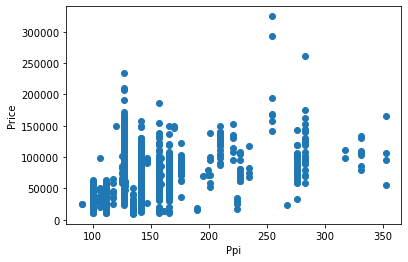

In [90]:
plt.scatter(x = df['Ppi'], y = df['Price'])
plt.xlabel('Ppi')
plt.ylabel('Price')
plt.show()

In [91]:
# finding the correlation coefficient between price and Ppi from correlation matrix

df.corr()['Price']['Ppi']

0.47988454680432935

In [92]:
# Displaying the correlation matrix

df.corr()

,Ram,Weight,Price,Ips_Panel,Touchscreen,Hdd,Ssd,Ppi
Ram,1.000000,0.382661,0.748437,0.204266,0.128421,0.111317,0.598263,0.324770
Weight,0.382661,1.000000,0.204333,0.015833,-0.292889,0.518325,-0.071146,-0.321776
Price,0.748437,0.204333,1.000000,0.250137,0.195484,-0.092633,0.671277,0.479885
Ips_Panel,0.204266,0.015833,0.250137,1.000000,0.148694,-0.090920,0.225365,0.300013
Touchscreen,0.128421,-0.292889,0.195484,0.148694,1.000000,-0.208376,0.260772,0.458494
Hdd,0.111317,0.518325,-0.092633,-0.090920,-0.208376,1.000000,-0.396890,-0.294117
Ssd,0.598263,-0.071146,0.671277,0.225365,0.260772,-0.396890,1.000000,0.521377
Ppi,0.324770,-0.321776,0.479885,0.300013,0.458494,-0.294117,0.521377,1.000000


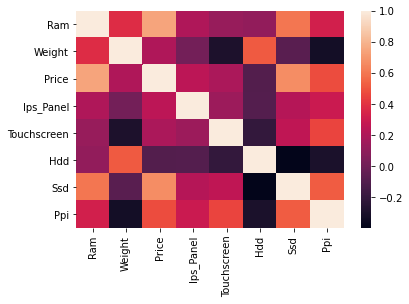

In [93]:
# displaying the heatmap for the above correlation matrix for visualization

sns.heatmap(df.corr())
plt.show()

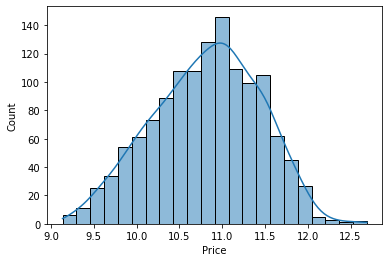

In [94]:
# plotting the distribution of log(price)

sns.histplot(np.log(df['Price']), kde = True)
plt.show()

In [95]:
# storing the values of the target column price after log transformation
y = np.log(df['Price'])

# viewing the current data
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1301, dtype: float64

In [96]:
# storing the values of the rest of the indepedant variables
X = df.drop(columns = 'Price')

# viewing the data
X

,Company,TypeName,Ram,Weight,Ips_Panel,Touchscreen,Cpu_Brand,Hdd,Ssd,Gpu_Brand,Operating_System,Ppi
0,Apple,Ultrabook,8,1.37,1,0,Intel Core i5,0,128,Intel,Mac,226.983005
1,Apple,Ultrabook,8,1.34,0,0,Intel Core i5,0,0,Intel,Mac,127.677940
2,HP,Notebook,8,1.86,0,0,Intel Core i5,0,256,Intel,Other OS / No OS,141.211998
3,Apple,Ultrabook,16,1.83,1,0,Intel Core i7,0,512,AMD,Mac,220.534624
4,Apple,Ultrabook,8,1.37,1,0,Intel Core i5,0,256,Intel,Mac,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,Intel Core i7,0,128,Intel,Windows,157.350512
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,Intel Core i7,0,512,Intel,Windows,276.053530
1300,Lenovo,Notebook,2,1.50,0,0,Other Intel Processor,0,0,Intel,Windows,111.935204
1301,HP,Notebook,6,2.19,0,0,Intel Core i7,1024,0,AMD,Windows,100.454670


# Splitting the data into test set and train set

## Neccessary Libraries and Modules required :

* train_test_split module in sklearn.model_selection library

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
# splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15 )

In [99]:
# viewing the X_train set

X_train

,Company,TypeName,Ram,Weight,Ips_Panel,Touchscreen,Cpu_Brand,Hdd,Ssd,Gpu_Brand,Operating_System,Ppi
622,Dell,Notebook,4,2.20,0,0,Intel Core i5,1024,0,AMD,Windows,141.211998
976,Lenovo,Notebook,4,1.70,0,0,Intel Core i5,0,0,Intel,Windows,111.935204
874,Samsung,Ultrabook,16,1.23,0,0,Intel Core i7,0,256,Nvidia,Windows,146.860478
1221,MSI,Gaming,8,2.20,0,0,Intel Core i7,1024,128,Nvidia,Windows,141.211998
1236,HP,Ultrabook,8,1.54,0,0,Intel Core i7,0,256,Intel,Windows,209.800683
...,...,...,...,...,...,...,...,...,...,...,...,...
1225,Asus,Notebook,4,2.65,0,0,Other Intel Processor,1024,0,Intel,Windows,100.454670
667,HP,Notebook,8,2.10,0,0,Intel Core i7,1024,0,AMD,Windows,141.211998
156,Lenovo,2 in 1 Convertible,4,1.74,1,1,Intel Core i3,0,256,Intel,Windows,157.350512
384,Asus,Ultrabook,16,1.10,0,1,Intel Core i7,0,512,Intel,Windows,165.632118


In [100]:
# Viewing the y_train set

y_train

622     10.629714
976     10.885314
874     11.497961
1221    11.272727
1236    11.670951
          ...    
1225     9.708902
667     10.588945
156     10.419692
384     11.442303
645      9.588689
Name: Price, Length: 1040, dtype: float64

In [101]:
# viewing the X_test set

X_test

,Company,TypeName,Ram,Weight,Ips_Panel,Touchscreen,Cpu_Brand,Hdd,Ssd,Gpu_Brand,Operating_System,Ppi
94,Asus,Ultrabook,8,1.25,0,0,Intel Core i7,0,256,Intel,Windows,157.350512
482,HP,Notebook,4,1.49,1,0,Intel Core i5,0,128,Intel,Windows,165.632118
295,Lenovo,Gaming,8,3.20,1,0,Intel Core i7,1024,0,Nvidia,Windows,141.211998
434,Lenovo,Notebook,16,2.50,0,0,Intel Core i7,0,512,Nvidia,Windows,141.211998
1015,Toshiba,Notebook,8,1.50,0,0,Intel Core i5,0,256,Intel,Windows,117.826530
...,...,...,...,...,...,...,...,...,...,...,...,...
1106,MSI,Gaming,8,2.90,0,0,Intel Core i7,1024,128,Nvidia,Windows,127.335675
665,Toshiba,Notebook,4,2.10,0,0,Intel Core i3,0,128,Intel,Windows,100.454670
185,Dell,Notebook,16,2.77,0,1,Intel Core i7,0,512,Nvidia,Windows,127.335675
326,Acer,Notebook,6,2.23,0,0,Intel Core i5,1024,0,Intel,Windows,100.454670


In [102]:
# viewing the y_test

y_test

94      10.931154
482     10.563111
295     11.144911
434     11.778996
1015    11.073937
          ...    
1106    11.296214
665     10.186161
185     11.320926
326     10.283659
420     11.524644
Name: Price, Length: 261, dtype: float64

# Building ML Model

## Neccessary Libraries required:


#### For Column Transformation of categorical variables:

* ColumnTransformer module in sklearn.compose library
* OneHotEncoder module in sklearn.preprocessing library

#### For Pipeline object

* Pipeline module in sklearn.pipeline library


#### For Linear Regression ML Model

* LinearRegression module in sklearn.linear_model library
* r2_score module module in sklearn.metrics library
* mean_absolute_error module in sklearn.metrics library

In [103]:
# importing neccessary modules from neccessary libraries

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

## Linear Regression Model

In [104]:
# building the pipeline structure for linear regression model

# step-1: applying column transformtion on the nominal categorical variables
col_transformer = ColumnTransformer( transformers = [
    ('nom_trans',OneHotEncoder(sparse = False, drop = 'first'), [0, 1, 6, 9, 10] )
], remainder = 'passthrough')

# step-2: creating a linear regression model after column transformations
regressor = LinearRegression()

# creating a pipe object for pipelining the above steps
pipe = Pipeline([
    ('Step1_col_trans', col_transformer),
    ('step2_regressor', regressor)
])

# passing the training data sets to the pipe object 
pipe.fit(X_train, y_train)

# predicting the target column y by passing the x test set
y_pred = pipe.predict(X_test)

### Model Performance

In [105]:
print("R2 Score :", r2_score(y_test, y_pred))
print("Mean Absolute Error(MAE):", mean_absolute_error(y_test, y_pred))

R2 Score : 0.8499332006699704
Mean Absolute Error(MAE): 0.19417520688075696


# Model Deployment

### Required Libraries:

* pickle

In [106]:
# importing neccessary library

import pickle

In [107]:
# Exporting the preprocessed and cleaned dataframe

df.to_csv('df.csv', index = False)

In [108]:
# deploying the model

pickle.dump(pipe, open('model.pkl', 'wb'))